## Write a program for Linear Spline, Quadratic Spline and Cubic Spline.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Spline

In [ ]:
def linear_spline(n,arr_x , arr_f_x):
       
    
    def l_s(n , arr_x , arr_f_x):

        a = [[0 for i in range(2*(n-1))] for i in range(2*(n-1))]
        b = [0 for i in range(2*(n-1))]

        
      
        # creating a
        a[0][0] = arr_x[0]
        a[-1][-2] = arr_x[-1]

        for i in range(0,2*(n-1),2):
            a[i][i+1] = 1
            a[i+1][i+1] = 1
        
        for i in range(0,len(arr_x)-2):
            a[2*i+1][2*i] = arr_x[i+1]
            a[2*i+2][2*i+2] = arr_x[i+1] 


      #creating b

        b[0] = arr_f_x[0]
        b[-1] = arr_f_x[-1]
        for i in range(1, len(arr_f_x)-1):
            b[2*i-1] = arr_f_x[i]
            b[2*i] = arr_f_x[i]


      # for inv of a
        a = np.array(a)
        b = np.array(b)
      
      # dot product of inv(a) and b matrix
        inv_a = np.linalg.inv(a)

        ans= np.dot(inv_a , b)

        return ans
    
    # print all lines
    def curves(ans):
        print("So here we get total {} lines.".format(n-1))
        eq = []
        for i in range(0,len(ans),2):
            print("line {}   :    {}*x+{}".format(i//2+1 ,round(ans[i],4),round(ans[i+1],4)))
            eq.append(str(ans[i])+'*x+'+str(ans[i+1]))
        return eq
        

    # plot graph of splines   
    def graph(n , arr_x , arr_f_x, arr_eq):
        plt.scatter(arr_x, arr_f_x,color='b',s=25)
        for i in range(n-1):
            x = np.linspace(arr_x[i] , arr_x[i+1] , 1000)
            y = eval(arr_eq[i])
            plt.plot(x , y  , label = arr_eq[i])
        plt.legend(loc= 'best' ,fontsize='small' )
        plt.grid()
        plt.title('linear Spline')
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()
  
    
    ans = l_s(n,arr_x,arr_f_x)
    ans = ans.round(4)      #round of upto 4 digits 
    print("\n")
    arr_eq = curves(ans)
    print("\n")
    
    graph(n,arr_x , arr_f_x,arr_eq)
    print("\n")


## Quadratic spline

In [ ]:
def quadratic_spline(n,arr_x , arr_f_x):
    
    def qs(n , arr_x , arr_f_x):
        
        
        

        #creating a
        a = [[0 for i in range(3*(n-1))] for i in range(3*(n-1))]
        a[0][0] = 1


        # initial conditoins 
        for i in range(0,n-1):
            if i == n-2:
                a[2*i+1][3*i] , a[2*i+1][3*i+1],a[2*i+1][3*i+2] = (arr_x[i])**2 , arr_x[i]  ,1
            else:
                a[2*i+1][3*i] , a[2*i+1][3*i+1],a[2*i+1][3*i+2] = (arr_x[i])**2 , arr_x[i]  ,1
                a[2*i+2][3*i],a[2*i+2][3*i+1],a[2*i+2][3*i+2] = (arr_x[i+1])**2 , arr_x[i+1] , 1
                a[-1][-3] , a[-1][-2],a[-1][-1] = arr_x[-1]**2 , arr_x[-1] , 1

        for i in range(0,n-2):
            a[2*(n-1)+i][3*i],a[2*(n-1)+i][3*i+1],a[2*(n-1)+i][3*i+3],a[2*(n-1)+i][3*i+4] = 2*arr_x[i+1] , 1,-2*arr_x[i+1] , -1

        # creating b
    
        b = [0 for i in range(3*(n-1))]
        b[1] , b[-1] = arr_f_x[0],arr_f_x[-1]
        for i in range(1,n-1):
            b[2*i] , b[2*i+1] = arr_f_x[i] , arr_f_x[i]

        b = np.array(b)

        a = np.array(a)
        inv_a = np.linalg.inv(a)

       # dot product of inv_a and b
        ans = np.dot(inv_a , b)
        ans= ans.round(4)

        return ans

    def curves(ans):
        print("So here we get total {} lines.".format(n-1))
        eq = []
        for i in range(0,len(ans),3):
                print("line {}   :    ({})*x^2+({})*x+({})".format(i//3+1 ,ans[i],ans[i+1],ans[i+2],4))
                eq.append("("+str(ans[i])+")"+'*x**2+'+"("+str(ans[i+1])+")"+'*x+'+"("+str(ans[i+2])+")")

        return eq
    
    def graph(n , arr_x , arr_f_x, arr_eq):
        plt.scatter(arr_x, arr_f_x,s=25)
        for i in range(n-1):
            x = np.linspace(arr_x[i] , arr_x[i+1] , 1000)
            y = eval(arr_eq[i])
            plt.plot(x , y  , label = arr_eq[i])
        plt.legend(loc= 'best' ,fontsize='small' )
        plt.grid()
        plt.title('Quadratic Spline')
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()
        
        
    ans = qs(n,arr_x,arr_f_x)
    ans = ans.round(2)
    print("\n")
    arr_eq = curves(ans)
    print("\n")
    graph(n,arr_x,arr_f_x,arr_eq)
    print("\n")

## Cubic Spline 

In [ ]:
def cubic_spline(n,arr_x,arr_f_x):
    def cs(n , arr_x , arr_f_x):
        
      #creating a
        a = [[0 for i in range(4*(n-1))] for i in range(4*(n-1))]

        for i in range(n-1):
            a[2*i][4*i],a[2*i][4*i+1],a[2*i][4*i+2],a[2*i][4*i+3] = (arr_x[i])**3,(arr_x[i])**2 , arr_x[i]  ,1
            a[2*i+1][4*i],a[2*i+1][4*i+1],a[2*i+1][4*i+2],a[2*i+1][4*i+3] = (arr_x[i+1])**3,(arr_x[i+1])**2 , arr_x[i+1]  ,1

      # first diff equal at knots
        for i in range(0,n-2):
            a[2*(n-1)+i][4*i],a[2*(n-1)+i][4*i+1],a[2*(n-1)+i][4*i+2] =  3*arr_x[i+1]**2,2*arr_x[i+1],1
            a[2*(n-1)+i][4*i+4],a[2*(n-1)+i][4*i+5],a[2*(n-1)+i][4*i+6] = -3*arr_x[i+1]**2,-2*arr_x[i+1],-1
            
      # second diff equal at knots
        for i in range(0,n-2):
            a[3*n-4+i][4*i],a[3*n-4+i][4*i+1],a[3*n-4+i][4*i+4],a[3*n-4+i][4*i+5] = 6*arr_x[i+1],2,-6*arr_x[i+1],-2

        a[-2][0],a[-2][1] = 6*arr_x[0],2
        a[-1][-4],a[-1][-3] = 6*arr_x[-1],2
        
        #creating b

        b = [0 for i in range(4*(n-1))]

        for i in range(n-1):
            b[2*i] = arr_f_x[i]
            b[2*i+1] = arr_f_x[i+1]


        a = np.array(a)
        b = np.array(b)

        inv_a = np.linalg.inv(a)

        ans = np.dot(inv_a , b)
        ans= ans.round(4)

        return ans

    def curves(ans):
        print("So here we get total {} lines.".format(n-1))
        eq = []
        for i in range(0,len(ans),4):
                print("line {}   :    ({})*x^3+({})*x^2+({})*x+({})".format(i//4+1 ,ans[i],ans[i+1],ans[i+2],ans[i+3]))
                eq.append("("+str(ans[i])+")"+'*x**3+'+"("+str(ans[i+1])+")"+'*x**2+'+"("+str(ans[i+2])+")"+'*x+'+"("+str(ans[i+3])+')')
        return eq

    def graph(n , arr_x , arr_f_x, arr_eq):
        plt.scatter(arr_x, arr_f_x,s=25)
        for i in range(n-1):
            x = np.linspace(arr_x[i] , arr_x[i+1] , 1000)
            y = eval(arr_eq[i])
            plt.plot(x , y  , label = arr_eq[i])
        plt.legend(loc= 'best' ,fontsize='small' )
        plt.grid()
        plt.title('cubic Spline')
        plt.xlabel('X axis')
        plt.ylabel('Y axis')
        plt.show()


    ans = cs(n,arr_x,arr_f_x)
    ans = ans.round(4)
    print("\n")
    arr_eq = curves(ans)
    print("\n")
    graph(n,arr_x,arr_f_x,arr_eq)
    print("\n")



## <span style='color:Blue'> All spline in just one function with graph.  </span>


In [ ]:
def spline():
    n = int(input("Enter how many points you have : "))
    arr_x = []
    arr_f_x = []
    for i in range(n):
        x = float(input("x{} = ".format(i)))
        f_x = float(input("f({}) = ".format(x)))
        arr_x.append(x)
        arr_f_x.append(f_x)
    print("************************************************************************************************")
    print("Linear spline")
    linear_spline(n , arr_x , arr_f_x)
    print("************************************************************************************************")
    print("Quadratic spline")
    quadratic_spline(n,arr_x , arr_f_x)
    print("************************************************************************************************")
    print("Cubic Spline")
    cubic_spline(n , arr_x , arr_f_x)
    

Enter how many points you have : 4
x0 = 3
f(3.0) = 2.5
x1 = 4.5
f(4.5) = 1
x2 = 7
f(7.0) = 2.5
x3 = 9
f(9.0) = 0.5
************************************************************************************************
Linear spline


So here we get total 3 lines.
line 1   :    -1.0*x+5.5
line 2   :    0.6*x+-1.7
line 3   :    -1.0*x+9.5




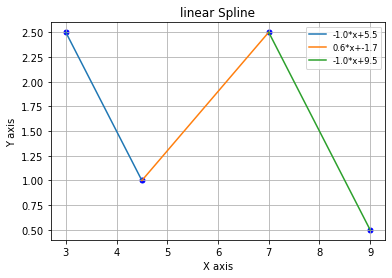



************************************************************************************************
Quadratic spline


So here we get total 3 lines.
line 1   :    (-0.0)*x^2+(-1.0)*x+(5.5)
line 2   :    (0.64)*x^2+(-6.76)*x+(18.46)
line 3   :    (-1.6)*x^2+(24.6)*x+(-91.3)




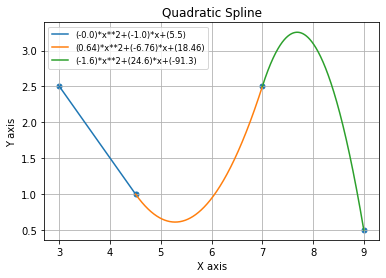



************************************************************************************************
Cubic Spline


So here we get total 3 lines.
line 1   :    (0.1866)*x^3+(-1.6791)*x^2+(3.6175)*x+(1.7221)
line 2   :    (-0.2141)*x^3+(3.7305)*x^2+(-20.7256)*x+(38.2367)
line 3   :    (0.1278)*x^3+(-3.4494)*x^2+(29.5338)*x+(-79.0354)




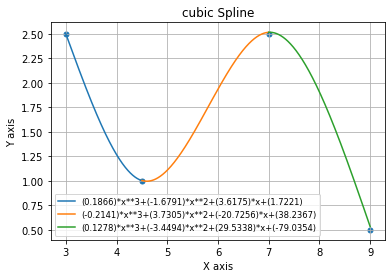

In [ ]:
spline()